In [199]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from numpy import nan
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

Всего в датасете 22245 записей. Они содержат информацию об:

- адресе
- количестве и типе коммунальных комнат
- серии проекта дома
- дату постройки, реконструкции
- жилой, нежилой площади
- доступных коммунальных услугах: отоплении, горячей воде, электричестве
- типе и количестве квартир
- названии управляющей компании

In [3]:
df = pd.read_csv('housing_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 47 columns):
addr_street                22245 non-null object
addr_number                22245 non-null object
addr_building              6423 non-null object
addr_letter                22132 non-null object
addr_district              22245 non-null object
comm_type                  13509 non-null object
comm_num                   13509 non-null object
comm_room_num              13509 non-null object
data_series                19233 non-null object
data_buildingdate          22242 non-null object
data_reconstructiondate    3555 non-null object
data_buildingarea          22244 non-null float64
data_livingarea            22245 non-null float64
data_nonolivingarea        12769 non-null float64
data_stairs                22165 non-null float64
data_storeys               22244 non-null float64
data_residents             21916 non-null float64
data_mansardarea           1201 non-null float64
eng_h

In [4]:
df.head()

,addr_street,addr_number,addr_building,addr_letter,addr_district,comm_type,comm_num,comm_room_num,data_series,data_buildingdate,data_reconstructiondate,data_buildingarea,data_livingarea,data_nonolivingarea,data_stairs,data_storeys,data_residents,data_mansardarea,eng_heatingcentral,eng_heatingauto,eng_heatingfire,eng_hotwater,eng_hotwatergas,eng_hotwaterwood,eng_electro,eng_gascentral,eng_gasnoncentral,eng_refusechute,flat_type,flat_num,flat_room_num,internal_num,lift_exploitfromdate,lift_reconstructiondate,lift_repairdate,outclean_all,param_crdate,param_ukname,param_failure,repair_year,repair_job,rfc_shaftcount,roof_metalarea,seng_liftcount,seng_pzu,special_basementarea,number
0,Королева пр.,31,1,В,Приморский,3 комн.,1,3,NaN,1986,NaN,9497.90,8399.20,NaN,4.0,9.0,402.0,NaN,1,0,0,1,0,0,1,0,0,1.0,"1 комн., 2 комн., 3 комн., 4 комн., 5 комн.","17, 36, 53, 18, 18","17, 72, 159, 72, 90",NaN,4 шт. - 1987 г.,2014 г.,NaN,NaN,NaN,ЖСК 1236,0.0,2014,Капитальный ремонт лифтов с частичной заменой ...,4.0,NaN,4.0,NaN,916.9,1
1,Дачный пр.,33,1,А,Кировский,"2 комн., 3 комн.","2, 2","4, 6",1-528 КП- 42,1966,NaN,15023.77,11388.88,1647.59,5.0,9.0,595.0,NaN,1,0,0,1,0,0,1,1,0,1.0,"1 комн., 2 комн., 3 комн.","64, 103, 77","64, 206, 231",7.0,1966- 5 ед.,NaN,2004 - 5 шт.,8022.0,02.02.2011,"Общество с ограниченной ответственностью ""Жилк...",0.0,2002; 2004; 2004; 2004; 2005; 2007; 2008; 2009...,Благоустройство придомовой территории; Благоус...,5.0,NaN,5.0,5.0,1444.0,2
2,Будапештская ул.,34,NaN,А,Фрунзенский,3 комн.,2,6,1-528-КП-40,1968,NaN,2416.93,1974.93,NaN,1.0,9.0,89.0,NaN,1,0,0,1,0,0,1,1,0,1.0,"1 комн., 2 комн., 3 комн.","18, 18, 7","18, 36, 21",2.0,1968,2012,NaN,3050.0,02.02.2011,"ООО ""Жилкомсервис № 2 Фрунзенского района""",0.0,2005; 2005; 2010; 2012; 2014,Капитальный ремонт лифтов с полной заменой обо...,1.0,NaN,1.0,1.0,353.0,3
3,Бухарестская ул.,86,2,А,Фрунзенский,"2 комн., 3 комн.","28, 4","56, 12",1ЛГ-502-9,1966,NaN,6882.20,6028.60,NaN,9.0,5.0,351.0,NaN,1,0,0,1,0,0,1,1,0,1.0,"2 комн., 3 комн.","104, 8","208, 24",NaN,NaN,NaN,NaN,5298.0,02.02.2011,"ООО ""Жилкомсервис № 2 Фрунзенского района""",0.0,NaN,NaN,NaN,NaN,NaN,9.0,1373.8,4
4,"г.Пушкин, Красносельское ш.",65,NaN,А,Пушкинский,3 комн.,3,9,528,1974,NaN,6409.70,5689.20,NaN,7.0,5.0,295.0,NaN,1,0,0,0,1,0,1,1,0,0.0,"1 комн., 2 комн., 3 комн.","11, 49, 42","11, 98, 126",NaN,NaN,NaN,NaN,8630.0,02.02.2011,"ООО ""Жилкомсервис № 1 Пушкинского района""",0.0,2007; 2007; 2008,Прочие работы по благоустройству; Ремонт и вос...,NaN,NaN,NaN,7.0,1282.0,5


Суммарная численность населения приблизительно отечает численности согласно переписи 2010 года. Считаем, что подавляющая часть населения проживает в многоквартирных домах.

In [5]:
df['data_residents'].sum()

5020073.0

Самая большая численность проживающих в доме. 

In [12]:
df['data_residents'].sort_values(ascending=False)

16927    8937.0
582      5635.0
15945    4422.0
18203    3718.0
16282    3705.0
          ...  
21873       NaN
21919       NaN
22177       NaN
22202       NaN
22233       NaN
Name: data_residents, Length: 22245, dtype: float64

Дом на  Федора Абрамова 8 представляет собой пять 27-этажных корпусов. Вероятно, это действительно самый большой жилой дом в СПб.

In [202]:
df.iloc[16927, :]

addr_street                              пос. Парголово, Федора Абрамова ул.
addr_number                                                                8
addr_building                                                            NaN
addr_letter                                                                А
addr_district                                                     Выборгский
comm_type                                                                NaN
comm_num                                                                 NaN
comm_room_num                                                            NaN
data_series                                                     1-СД/2010-ПР
data_buildingdate                                                       2013
data_reconstructiondate                                                  NaN
data_buildingarea                                                     233074
data_livingarea                                                       153544

Серии домов.

In [16]:
len(df['data_series'].unique())

1820

In [17]:
df['data_series'].unique()

array([nan, '1-528 КП- 42', '1-528-КП-40', ..., '1-528 КП -9Э',
       '1ЛГ-502-В-7', 'индив'], dtype=object)

Годы возведения. Пик в 1917  году вызван тем, что, по-видимости, многие дома дореволюционной постройки с неустановленной датой завершения строительства записаны этим годом

In [204]:
years = df['data_buildingdate'][df['data_buildingdate'].astype(str).apply(lambda x: x.isnumeric())]
years_correction = df['data_buildingdate'][df['data_buildingdate'].astype(str).\
                                           apply(lambda x: not x.isnumeric())].\
                                           apply(lambda x: str(x)[-4:] [-4:] if str(x)[-4:].isnumeric() else nan)
years_full = years.append(years_correction).dropna().astype(int)

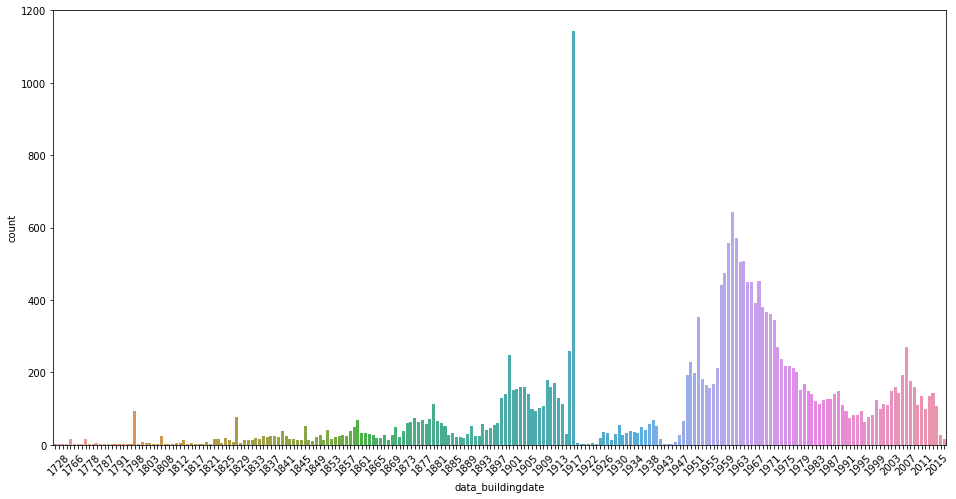

In [207]:
fig, ax = plt.subplots(figsize=(16, 8))
sb.countplot(years_full,  ax=ax)
plt.xticks(rotation=45)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

Число жилых помещений и коммунальных жилых помещений. Всего в датасете 13509 записей о домах с коммунальными квартирами.

In [119]:
ds_comm_count = df['comm_room_num'].dropna().apply(lambda x: sum([int(xx) for xx in  str(x).split(', ')]))

In [120]:
ds_room_count = df['flat_room_num'].dropna().apply(lambda x: sum([int(xx) for xx in  str(x).split(', ')]))

Всего коммунальных жилых помещений в городе (комнат)

In [220]:
ds_comm_count.sum()

357700

Всего жилых помещений в городе (комнат)

In [122]:
ds_room_count.sum()

4083155

Мода количества коммунальных жилых помещений в доме. Это скорее отдельная коммунальная квартира в "некоммунальном" доме

In [218]:
ds_comm_count.mode()

0    3
dtype: int64

Максимальное количество коммунальных жилых помещений в доме

In [209]:
ds_comm_count.max()

1014

In [225]:
ds_comm_count.argmax()

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


17922

Общежитие на Запорожской улице 23, к2 (12 этажей)

In [226]:
df.iloc[17922, :]

addr_street                                                  Запорожская ул.
addr_number                                                               23
addr_building                                                              2
addr_letter                                                                А
addr_district                                                        Невский
comm_type                                                            7 комн.
comm_num                                                                  31
comm_room_num                                                           1014
data_series                                                   Индивидуальный
data_buildingdate                                                       1984
data_reconstructiondate                                                  NaN
data_buildingarea                                                    17296.2
data_livingarea                                                        12948

In [126]:
ds_comm_count.to_csv('comm_count.csv')
ds_room_count.to_csv('room_count.csv')

/home/gustav/Projects/StPHousing/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Сводная информация о количестве домов, проживающих, числе и дате постройки, сагреггированная по районам.

In [228]:
house_count = df[['addr_district', 'addr_street']].groupby(by='addr_district').count()
comm_count = df[['addr_district']].join(ds_comm_count).groupby(by='addr_district').sum()
resident_count = df[['addr_district', 'data_residents']].groupby(by='addr_district').sum()
biulding_year_med = df[['addr_district']].join(years_full.astype(int)).groupby(by='addr_district').median()
storeys_count = df[['addr_district', 'data_storeys']].groupby(by='addr_district').mean()

Население районов несколько превышает данные переписи 2010 года

In [229]:
house_count.join(resident_count).join(comm_count).join(biulding_year_med).join(storeys_count)

,addr_street,data_residents,comm_room_num,data_buildingdate,data_storeys
addr_district,,,,,
Адмиралтейский,1637,172072.0,42652.0,1885.0,4.635308
Василеостровский,1194,213862.0,24869.0,1917.0,6.161642
Выборгский,1433,482994.0,24636.0,1969.0,8.420796
Калининский,1471,545492.0,21952.0,1969.0,8.117007
Кировский,1625,359238.0,22423.0,1964.0,6.631385
Колпинский,748,177236.0,5605.0,1964.0,5.835561
Красногвардейский,1143,354899.0,24114.0,1964.0,7.600175
Красносельский,1005,376389.0,9910.0,1972.0,8.066667
Кронштадтский,328,43814.0,2158.0,1934.0,4.417683


Более детальное представление информации о годе постройки по районам (для сохранившихся домов)

Данные переписи 2010, Петростат (https://petrostat.gks.ru/storage/mediabank/%D0%9E%D1%81%D0%BD+%D0%B8%D1%82%D0%BE%D0%B3%D0%B8+%D0%92%D0%9F%D0%9D-2010+%D0%B2+%D0%A1%D0%9F%D0%B1.pdf).

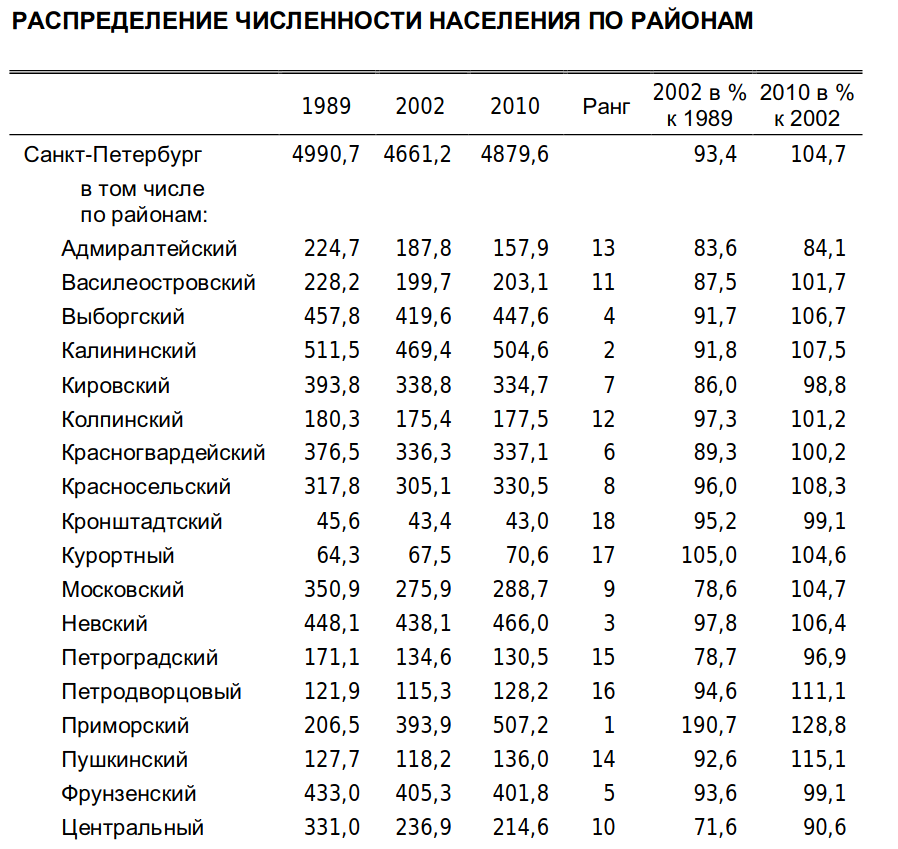

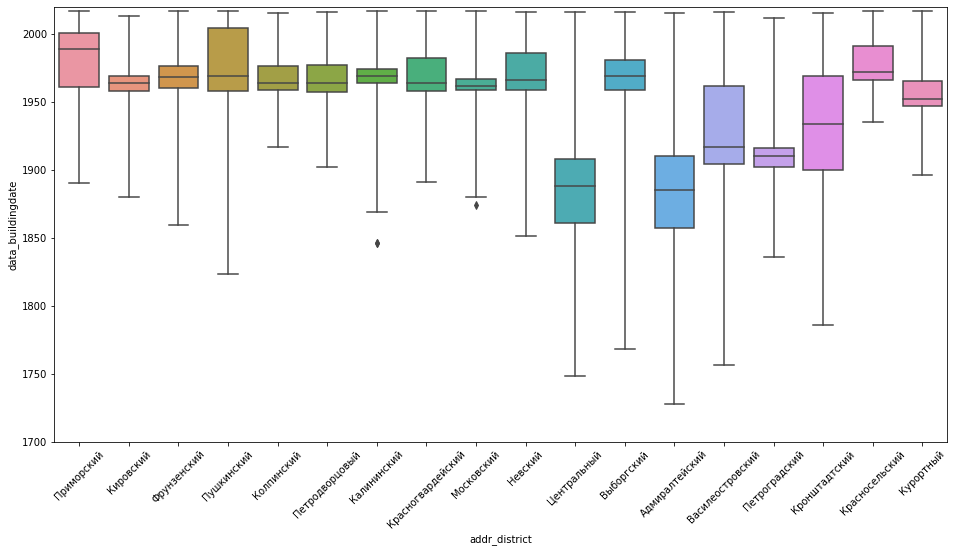

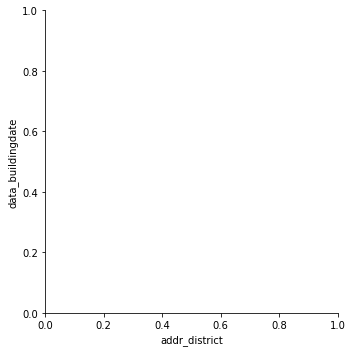

In [198]:
fig, ax = plt.subplots(figsize=(16, 8))
sb.countplot(years,  ax=ax)
plt.xticks(rotation=45)
g = sb.catplot(x="addr_district", y="data_buildingdate", kind="box",
               data=df[['addr_district']].join(years_full), ax=ax,
               whis=10);
ax.set(ylim=(1700, 2020));

В целом, информация рассмотренных категорий (адреса, харктеристики жилых помещений, население) выглядит полной.